# 03. Employee Retention

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [4]:
from platform import python_version
print(python_version())

3.6.10


In [5]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px solid lightgray;
}

## Load Dataset

In [20]:
data = pd.read_csv('E:/Collection_DS_takehome_challenges/Data/employee_retention.csv')
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   employee_id  24702 non-null  float64       
 1   company_id   24702 non-null  int64         
 2   dept         24702 non-null  object        
 3   seniority    24702 non-null  int64         
 4   salary       24702 non-null  float64       
 5   join_date    24702 non-null  datetime64[ns]
 6   quit_date    13510 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [67]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [10]:
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

## Create Table for day, employee_headcount, and company_id

In [35]:
# Define table
unique_date=pd.date_range(start='2011-01-24',end='2015-12-13',freq='D')
unique_company=sorted(data['company_id'].unique())
print(unique_date[0:6])
print(unique_company)

DatetimeIndex(['2011-01-24', '2011-01-25', '2011-01-26', '2011-01-27',
               '2011-01-28', '2011-01-29'],
              dtype='datetime64[ns]', freq='D')
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [41]:
day = []
company = []
headcount = []
for date in unique_date:
    for idx in unique_company:
        total_join=len(data[(data['join_date']<=date) & (data['company_id']==idx)])
        total_quit=len(data[(data['quit_date']<=date) & (data['company_id']==idx)])
        day.append(date)
        company.append(idx)
        headcount.append(total_join-total_quit)
        
table=pd.DataFrame({'day':day,'company_id':company,'employee_headcount':headcount}, columns=
                  ['day','company_id','employee_headcount'])        

In [42]:
table.head(20)

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
5,2011-01-24,6,3
6,2011-01-24,7,1
7,2011-01-24,8,6
8,2011-01-24,9,3
9,2011-01-24,10,0


## Employee Churn Analysis

In [44]:
# Separate stay and quit data
quit_data=data[~data['quit_date'].isnull()]
stay_data=data[data['quit_date'].isnull()]

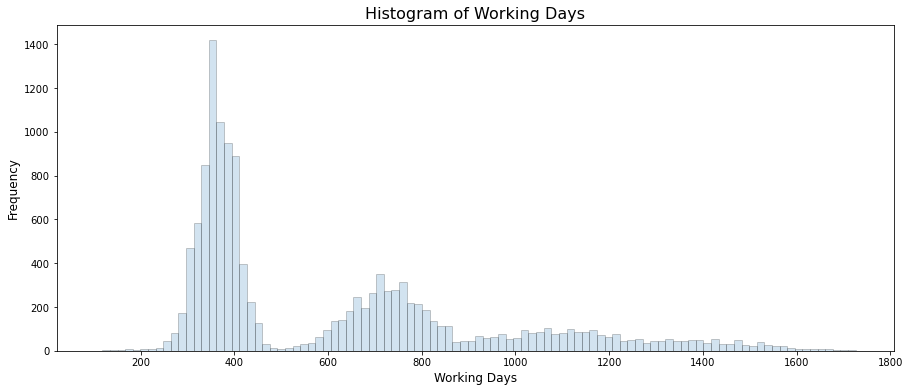

In [46]:
# Total working days
work_days=np.array(list(map(lambda x: x.days, quit_data['quit_date']-quit_data['join_date'])))
hist_kws={'histtype':'bar','edgecolor':'black','alpha':0.2}
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(work_days,bins=100,kde=False,ax=ax,hist_kws=hist_kws)
ax.set_title('Histogram of Working Days',fontsize=16)
ax.set_xlabel('Working Days',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
plt.show()

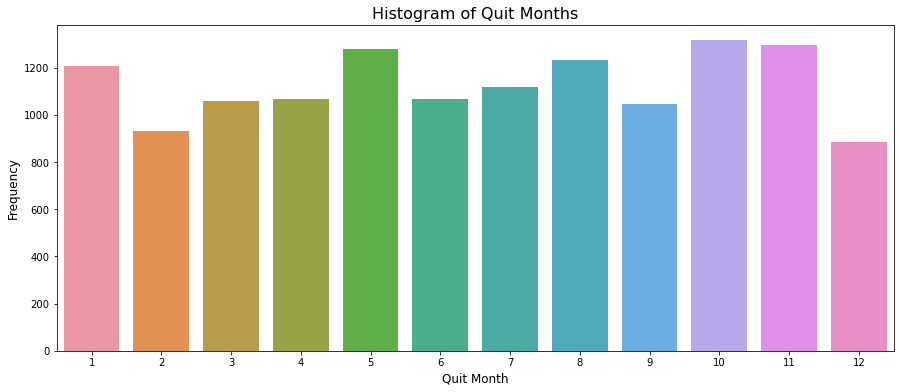

In [49]:
# quit Months
quit_month=np.array(list(map(lambda x: x.month, quit_data['quit_date'])))
fig,ax=plt.subplots(figsize=(15,6))
sns.countplot(quit_month,ax=ax)
ax.set_title('Countplot of Quit Months',fontsize=16)
ax.set_xlabel('Quit Month',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
plt.show()

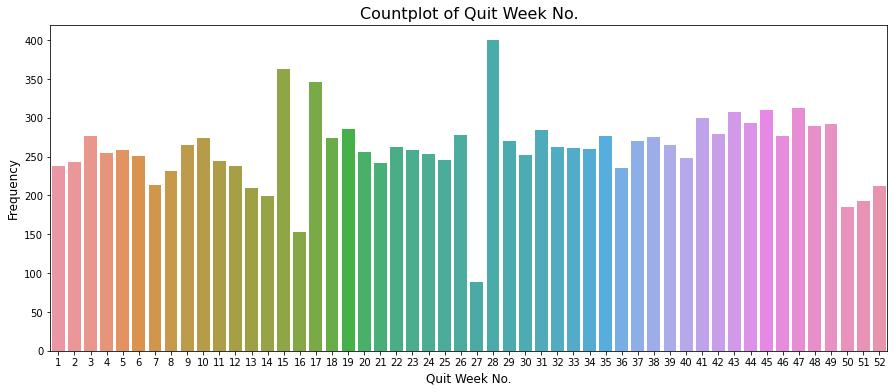

In [50]:
# quit Weeks
quit_week=np.array(list(map(lambda x: x.week, quit_data['quit_date'])))
fig,ax=plt.subplots(figsize=(15,6))
sns.countplot(quit_week,ax=ax)
ax.set_title('Countplot of Quit Week No.',fontsize=16)
ax.set_xlabel('Quit Week No.',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
plt.show()

In [51]:
# Choose quit data
quit_data['work_days'] = work_days
quit_data['quit_week'] = quit_week

quit_data.head()

D:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,work_days,quit_week
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585,44
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340,14
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389,23
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040,34
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,578,35


## Decision Tree Model

In [57]:
# Choose the subset data - most of employees quit before working until 450 days
stop_date=pd.to_datetime('2015-12-13')-pd.DateOffset(days=450)
subset=data[data['join_date']<stop_date]

# Binary variable for early quie (less than 13 months)
quit=subset['quit_date'].isnull() | (subset['quit_date']> subset['join_date']+ pd.DateOffset(months=13))
subset['quit']=1-quit.astype(int)

subset.head()

D:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,0


In [ ]:
# # One-hot encoding
# subset['company_id'] = subset['company_id'].astype(str)
# dummies = pd.get_dummies(subset[['company_id', 'dept']])
# train_x = pd.concat(objs=[subset[['seniority', 'salary']], dummies], axis=1)
# train_y = subset['quit'].values

# train_x.head()

In [60]:
# Label encoder
le=LabelEncoder()
subset['dept']=le.fit_transform(subset['dept'])


train_x=subset[['company_id','seniority','salary','dept']]
train_y=subset['quit'].values

train_x.head()

D:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,company_id,seniority,salary,dept
0,7,28,89000.0,0
1,7,20,183000.0,4
3,7,20,115000.0,0
4,2,23,276000.0,1
5,4,14,165000.0,1


In [62]:
# Decision Tree
clf=DecisionTreeClassifier(max_depth=3,min_samples_leaf=30,random_state=2)
clf=clf.fit(X=train_x,y=train_y)

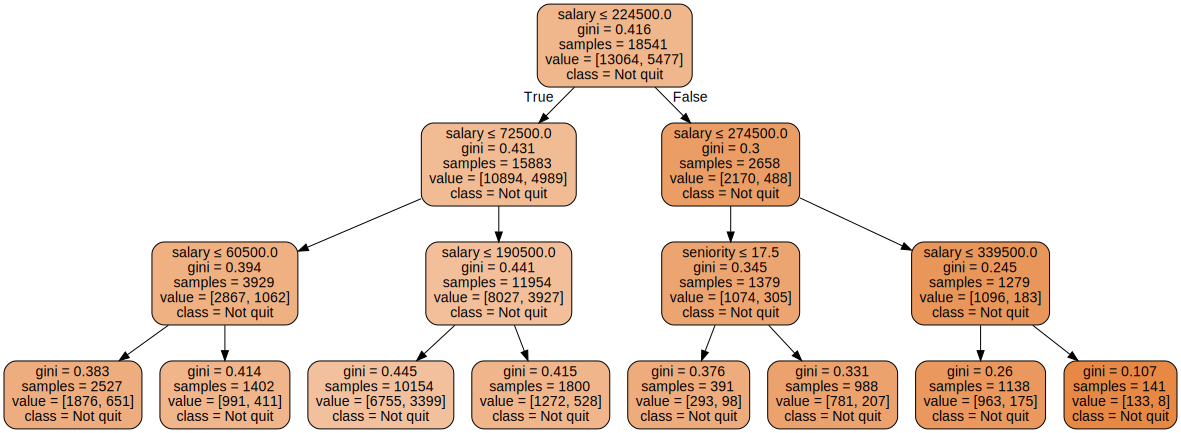

In [64]:
# Visualization
features=list(train_x.columns)
targets=['Not quit','Quit']
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=features,class_names=targets,
                             filled=True,rounded=True,special_characters=True,)
graph=graphviz.Source(dot_data)
graph

In [65]:
# Feature importance
importance = sorted(zip(features, clf.feature_importances_), key=lambda x:x[1], reverse=True)
for feature, val in importance:
    print('{0:10s} | {1:.5f}'.format(feature, val))

salary     | 0.99187
seniority  | 0.00813
company_id | 0.00000
dept       | 0.00000


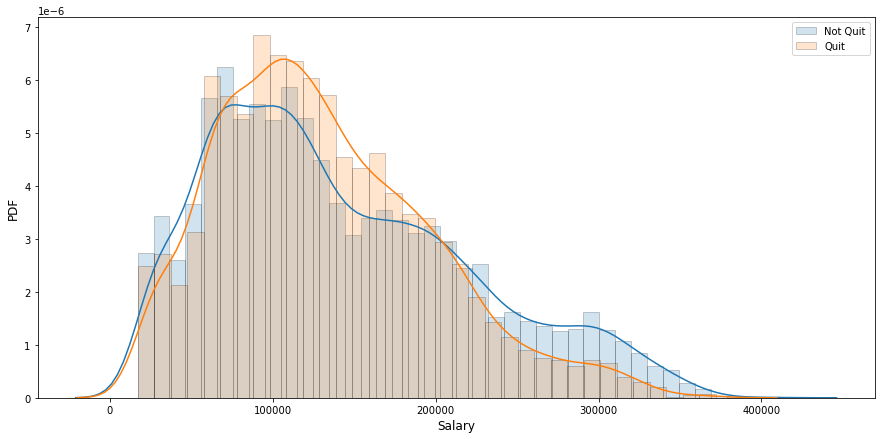

In [66]:
# Visualization
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(subset[subset['quit']==0]['salary'], 
             label='Not Quit', ax=ax, hist_kws=hist_kws)
sns.distplot(subset[subset['quit']==1]['salary'], 
             label='Quit', ax=ax, hist_kws=hist_kws)
ax.set_xlabel('Salary', fontsize=12)
ax.set_ylabel('PDF', fontsize=12)
ax.legend()
plt.show()

## Conclusion

1. Given how important is salary, I would definitely love to have as a variable the salary the employee who quit was offered in the next job. Otherwise, things like: promotions or raises received during the employee tenure would be interesting.

2. The major findings are that employees quit at year anniversaries or at the beginning of the year. Both cases make sense. Even if you don’t like your current job, you often stay for 1 yr before quitting + you often get stocks after 1 yr so it makes sense to wait. Also, the beginning of the year is well known to be the best time to change job: companies are hiring more and you often want to stay until end of Dec to get the calendar year bonus.

3. Employees with low and high salaries are less likely to quit. Probably because employees with high salaries are happy there and employees with low salaries are not that marketable, so they have a hard time finding a new job.